In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data uploading and Preprocessing

In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
#Start with 20k dataset with numbers replaced as 0
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"


In [4]:
import os
filenames = [data_dir+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [5]:
#Preprocess data

def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()


In [6]:
train_lines = get_lines('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')

In [7]:
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
len(train_lines)

210040

**Creating a function to read the text and covert them into a dict**

In [9]:
def seperator(filename):
  lines = get_lines(filename)
  abstract_lines = ''
  abstract_samples=[]
  for line in lines:
    if line.startswith('###'):
      abstract_id= line
      abstract_lines = ''
    elif line.isspace():
      abstract_lines_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_lines_split):
        line_data={}
        target_text_split = abstract_line.split('\t')
        line_data['line_number'] = abstract_line_number
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['total_lines'] = len(abstract_lines_split) -1

        abstract_samples.append(line_data)
    else:
       abstract_lines = abstract_lines + line
  return abstract_samples 

    


In [10]:
train_samples = seperator('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
val_samples = seperator('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')
test_samples = seperator('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')

In [11]:
len(train_samples)

180040

In [12]:
train_samples[:10]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [13]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [14]:
train_df.head(14)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11
7,7,RESULTS,the mean difference between treatment arms ( @...,11
8,8,RESULTS,"further , there was a clinically relevant redu...",11
9,9,RESULTS,these differences remained significant at @ we...,11


In [15]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [16]:
#seperating text and label
train_text = train_df['text'].tolist()
val_text = val_df['text'].tolist()
test_text = test_df['text'].tolist()

**Encoding the Label for Multi-Class Classification**

In [17]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

train_target = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_target = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_target = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

In [18]:
train_target[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [19]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_target1 = label_encoder.fit_transform(train_df['target'].to_numpy())
val_target1 = label_encoder.transform(val_df['target'].to_numpy())
test_target1 = label_encoder.transform(test_df['target'].to_numpy())

In [20]:
train_target1[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

In [21]:
#Get classnames from label encoder

num_classes  = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes,class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [22]:
train_text[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

# Model_0 : Naive Bayes with TF-IDF encoder

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
          ('tfidf',TfidfVectorizer()),
          ('clf',MultinomialNB())
])
#use the label encoded target
model_0.fit(train_text,train_target1)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [24]:
model0_score = model_0.score(val_text,val_target1)
model0_score

0.7218323844829869

In [25]:
#Creating a classification metrics function
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  acc = accuracy_score(y_true,y_pred)*100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = { "Accuracy":acc,
                    "Precision":model_precision,
                    "Recall" :model_recall,
                     "F1_score":model_f1 
  }
  return model_results


In [26]:
model0_preds = model_0.predict(val_text)

In [27]:
model0_preds

array([4, 1, 3, ..., 4, 4, 1])

In [28]:
calculate_results(val_target1,model0_preds)

{'Accuracy': 72.1832384482987,
 'F1_score': 0.6989250353450294,
 'Precision': 0.7186466952323352,
 'Recall': 0.7218323844829869}

# Tokenize for Deep NN

In [29]:
#How long is the sentence on average
round(sum([len(i.split()) for i in train_text])/len(train_text))

26

(array([1.6499e+04, 5.6664e+04, 5.2683e+04, 2.9050e+04, 1.3111e+04,
        5.6610e+03, 3.0490e+03, 1.5190e+03, 8.0800e+02, 4.3200e+02,
        2.2600e+02, 1.2800e+02, 7.7000e+01, 3.9000e+01, 3.0000e+01,
        1.5000e+01, 9.0000e+00, 8.0000e+00, 4.0000e+00, 8.0000e+00,
        7.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.        ,  10.83333333,  20.66666667,  30.5       ,
         40.33333333,  50.16666667,  60.        ,  69.83333333,
         79.66666667,  89.5       ,  99.33333333, 109.16666667,
        119.        , 128.83333333, 138.66666667, 148.5       ,
        158.33333333, 168.16666667, 178.        , 187.83333333,
        197.66666667, 207.5       , 217.33333333, 227.16666667,
        237.        , 246.83333333, 256.66666667, 266.5       ,
        276.33333333, 286.16666667, 296.        ]),
 <a list of 30 Patch objects>)

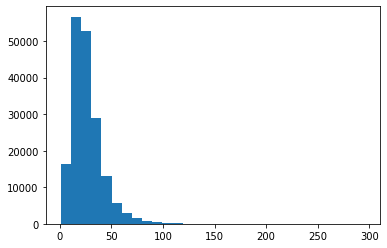

In [30]:
#Distribution of sentence length
sent_length = [len(i.split()) for i in train_text]
plt.hist(sent_length,bins=30)

In [31]:
#How long of a sentence length cover 95% train data?

output_len = int(np.percentile(sent_length,95))
output_len

55

In [32]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_size=68000
max_length = 55

text_vectorizer = TextVectorization(max_tokens=max_vocab_size,
                                    output_sequence_length=max_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    pad_to_max_tokens=True)

#Fit text_vectorizer to training data
text_vectorizer.adapt(train_text)

In [33]:
#Test out text vectorizer
import random
sample = random.choice(train_text)
print(f"sample sentence: {sample}")
print(f"Length of sample sentence: {len(sample.split())}")
print(f"sample sentence: {text_vectorizer([sample])}")

sample sentence: cto of surgically bypassed coronary arteries @ year after coronary artery bypass grafting is extremely common .
Length of sample sentence: 17
sample sentence: [[ 8739     4  5533 27242   346  3489   157    21   346   543  1159  2864
     20  3945   317     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [34]:
sam_vector = text_vectorizer([sample])
sam_vector.shape

TensorShape([1, 55])

In [35]:
#Total words in our vectorizer vocab
vocab = text_vectorizer.get_vocabulary()
print(f"No of words in vocab: {len(vocab)}")
print(f"Most Common words in vocab: {vocab[:5]}")
print(f"Least common words in vocab: {vocab[-5:]}")

No of words in vocab: 64841
Most Common words in vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


# Embedding

In [36]:
from tensorflow.keras import layers

#converts each int token into a 128 dim vector randomly initialized

embedding = layers.Embedding(input_dim = max_vocab_size,
                             output_dim = 128,
                             mask_zero=True,
                             input_length=max_length,
                             name='token_embedding')

In [37]:
#Embedding Example
print(f"sample sentence: {sample}\n")
vec_sample = text_vectorizer([sample])
print(f"Text vector sentence: {vec_sample}\n")
embed_sample = embedding(vec_sample)
print(f"Embedding sentence: {embed_sample}")

sample sentence: cto of surgically bypassed coronary arteries @ year after coronary artery bypass grafting is extremely common .

Text vector sentence: [[ 8739     4  5533 27242   346  3489   157    21   346   543  1159  2864
     20  3945   317     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Embedding sentence: [[[ 0.00566932  0.04651041  0.01268889 ... -0.03302192 -0.03579786
    0.03985933]
  [-0.01608833 -0.03008424  0.00029036 ...  0.02768982 -0.0312911
    0.03523192]
  [ 0.02641347  0.02397171 -0.02031874 ...  0.00619759 -0.046593
   -0.03389843]
  ...
  [ 0.02745745  0.03357356  0.01174289 ... -0.0374492  -0.04167526
    0.00608252]
  [ 0.02745745  0.03357356  0.01174289 ... -0.0374492  -0.04167526
    0.00608252]
  [ 0.02745745  0.03357356  0.01174289 ... -0.0374492  -0.04167526


In [38]:
embed_sample.shape

TensorShape([1, 55, 128])

# Converting training and test data into tf datasets for faster computation

In [39]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_text,train_target)) #Using one hot target
val_dataset = tf.data.Dataset.from_tensor_slices((val_text,val_target))
test_dataset = tf.data.Dataset.from_tensor_slices((test_text,test_target))

In [40]:
train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [41]:
#Turn datasets into prefetch batches improve the training speed
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [42]:
train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

# Model_1 : Conv1D with Token embedding

In [43]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(64,3,activation='relu',padding='same')(x)
x = layers.Conv1D(64,3,activation='relu',padding='same')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5,activation='softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

In [44]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embedding (Embedding)  (None, 55, 128)           8704000   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            24640     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 55, 64)            12352     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325   

In [45]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [46]:
history_1  = model_1.fit(train_dataset,epochs=3,
                         steps_per_epoch = int(0.1*len(train_dataset)), #Reducing the train data for faster evaluation
                         validation_data = val_dataset,
                         validation_steps = int(0.1*len(val_dataset)) #Only validate on 10% valid data
                         )

Epoch 1/3
562/562 [==============================] - 90s 108ms/step - loss: 0.8928 - accuracy: 0.6360 - val_loss: 0.6908 - val_accuracy: 0.7347
Epoch 2/3
562/562 [==============================] - 61s 108ms/step - loss: 0.6693 - accuracy: 0.7435 - val_loss: 0.6574 - val_accuracy: 0.7553
Epoch 3/3
562/562 [==============================] - 60s 108ms/step - loss: 0.6318 - accuracy: 0.7631 - val_loss: 0.6059 - val_accuracy: 0.7829


In [47]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.6160 - accuracy: 0.7756


[0.6160421967506409, 0.7755858302116394]

In [48]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred = tf.argmax(model_1_pred_probs,axis=1)
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 2, 2, 2, 4, 1])>

In [49]:
calculate_results(val_target1,model_1_pred)

{'Accuracy': 77.55858599232093,
 'F1_score': 0.7743040331217157,
 'Precision': 0.7743230049936415,
 'Recall': 0.7755858599232093}

# Model_2: Tensorflow Hub pretrained feature extractor

In [50]:
from tensorflow.keras import layers
import tensorflow_hub as hub

embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[], dtype=tf.string,
                       trainable=False)

model_2 = tf.keras.Sequential([
        embed,
        layers.Dense(128,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(5,activation='softmax')                       
])

In [51]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1

In [52]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [53]:
history_2  = model_2.fit(train_dataset,epochs=10,
                         steps_per_epoch = int(0.1*len(train_dataset)), #Reducing the train data for faster evaluation
                         validation_data = val_dataset,
                         validation_steps = int(0.1*len(val_dataset)) #Only validate on 10% valid data
                         )

Epoch 1/10
562/562 [==============================] - 14s 19ms/step - loss: 0.9147 - accuracy: 0.6310 - val_loss: 0.7717 - val_accuracy: 0.7018
Epoch 2/10
562/562 [==============================] - 10s 18ms/step - loss: 0.7372 - accuracy: 0.7157 - val_loss: 0.7118 - val_accuracy: 0.7277
Epoch 3/10
562/562 [==============================] - 10s 18ms/step - loss: 0.7126 - accuracy: 0.7245 - val_loss: 0.6830 - val_accuracy: 0.7330
Epoch 4/10
562/562 [==============================] - 10s 18ms/step - loss: 0.6798 - accuracy: 0.7437 - val_loss: 0.6741 - val_accuracy: 0.7453
Epoch 5/10
562/562 [==============================] - 10s 18ms/step - loss: 0.6836 - accuracy: 0.7373 - val_loss: 0.6429 - val_accuracy: 0.7493
Epoch 6/10
562/562 [==============================] - 10s 18ms/step - loss: 0.6825 - accuracy: 0.7371 - val_loss: 0.6446 - val_accuracy: 0.7623
Epoch 7/10
562/562 [==============================] - 10s 18ms/step - loss: 0.6530 - accuracy: 0.7510 - val_loss: 0.6282 - val_accuracy:

In [54]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 15s 15ms/step - loss: 0.6222 - accuracy: 0.7635


[0.6221706867218018, 0.7635045647621155]

In [55]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred = tf.argmax(model_2_pred_probs,axis=1)
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 3, 2, 2, 4, 4, 2, 4, 1])>

In [56]:
calculate_results(val_target1,model_2_pred)

{'Accuracy': 76.35045677214352,
 'F1_score': 0.7599863000134777,
 'Precision': 0.7585112426502911,
 'Recall': 0.7635045677214352}

# Model_3: Conv1D with character embedding

In [57]:
#Creating character token

#make fn to spit setence to char
def split_chars(text):
  return " ".join(list(text))

In [58]:
#example
" ".join(list(sample))

'c t o   o f   s u r g i c a l l y   b y p a s s e d   c o r o n a r y   a r t e r i e s   @   y e a r   a f t e r   c o r o n a r y   a r t e r y   b y p a s s   g r a f t i n g   i s   e x t r e m e l y   c o m m o n   .'

In [59]:
train_chars = [split_chars(sentence) for sentence in train_text ]
val_chars = [split_chars(sentence) for sentence in val_text ]
test_chars = [split_chars(sentence) for sentence in test_text ]

In [60]:
#Avg char length
char_lens = [len(sentence) for sentence in train_text]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([2.2108e+04, 7.0583e+04, 5.3952e+04, 2.2391e+04, 7.4540e+03,
        2.2350e+03, 8.0200e+02, 2.8700e+02, 1.1800e+02, 4.9000e+01,
        2.9000e+01, 1.3000e+01, 8.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 7.02500e+01, 1.39500e+02, 2.08750e+02, 2.78000e+02,
        3.47250e+02, 4.16500e+02, 4.85750e+02, 5.55000e+02, 6.24250e+02,
        6.93500e+02, 7.62750e+02, 8.32000e+02, 9.01250e+02, 9.70500e+02,
        1.03975e+03, 1.10900e+03, 1.17825e+03, 1.24750e+03, 1.31675e+03,
        1.38600e+03]),
 <a list of 20 Patch objects>)

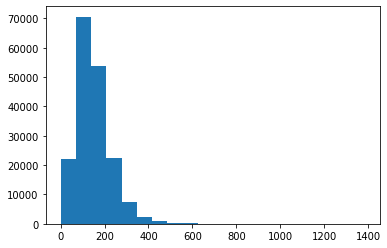

In [61]:
#Check distribution
plt.hist(char_lens,bins=20)


In [62]:
#Find what char length covers 95% sequences
output_char_len = int(np.percentile(char_lens,95))
output_char_len

290

In [63]:
#Get all keyboard character
import string
aplhabet = string.ascii_lowercase + string.digits + string.punctuation
len(aplhabet)

68

In [64]:
#Creating Character tokens

max_char_token=70
output_seq_len = 290

char_vectorizer = TextVectorization(max_tokens=max_char_token,
                                    output_sequence_length=output_seq_len,
                                    pad_to_max_tokens=True)

#Fit text_vectorizer to training data
char_vectorizer.adapt(train_chars)

In [65]:
char_vocab = char_vectorizer.get_vocabulary()
char_vocab[:10]

['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

Embedding Layer

In [66]:
embedding_char = layers.Embedding(input_dim = len(char_vocab),
                             output_dim = 25,
                             mask_zero=True,
                             name='char_embedding')

Model building

In [67]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype=tf.string)
x = char_vectorizer(inputs)
x = embedding_char(x)
x = layers.Conv1D(128,3,activation='relu',padding='same')(x)
x = layers.Conv1D(128,3,activation='relu',padding='same')(x)
x = layers.Conv1D(64,3,activation='relu',padding='same')(x)
x = layers.Conv1D(64,3,activation='relu',padding='same')(x)
x = layers.Conv1D(32,3,activation='relu',padding='same')(x)
x = layers.Conv1D(16,3,activation='relu',padding='same')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5,activation='softmax')(x)

model_3 = tf.keras.Model(inputs,outputs)

In [68]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 290)               0         
_________________________________________________________________
char_embedding (Embedding)   (None, 290, 25)           700       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 290, 128)          9728      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 290, 128)          49280     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 290, 64)           24640     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 290, 64)           1235

In [69]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [70]:
#Creating dataset
trainchar_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_target)) #Using one hot target
valchar_dataset = tf.data.Dataset.from_tensor_slices((val_chars,val_target))
testchar_dataset = tf.data.Dataset.from_tensor_slices((test_chars,test_target))


train_char_dataset = trainchar_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = valchar_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = testchar_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [71]:
history_3  = model_3.fit(train_char_dataset,epochs=10,
                         steps_per_epoch = int(0.1*len(train_char_dataset)), #Reducing the train data for faster evaluation
                         validation_data = val_char_dataset,
                         validation_steps = int(0.1*len(val_char_dataset)) #Only validate on 10% valid data
                         )

Epoch 1/10
562/562 [==============================] - 12s 19ms/step - loss: 1.3167 - accuracy: 0.4071 - val_loss: 1.2090 - val_accuracy: 0.4757
Epoch 2/10
562/562 [==============================] - 10s 18ms/step - loss: 1.1580 - accuracy: 0.5134 - val_loss: 1.0908 - val_accuracy: 0.5322
Epoch 3/10
562/562 [==============================] - 10s 18ms/step - loss: 1.0439 - accuracy: 0.5746 - val_loss: 0.9889 - val_accuracy: 0.5944
Epoch 4/10
562/562 [==============================] - 10s 18ms/step - loss: 0.9749 - accuracy: 0.6088 - val_loss: 0.9303 - val_accuracy: 0.6230
Epoch 5/10
562/562 [==============================] - 10s 18ms/step - loss: 0.9267 - accuracy: 0.6337 - val_loss: 0.9146 - val_accuracy: 0.6426
Epoch 6/10
562/562 [==============================] - 10s 18ms/step - loss: 0.8925 - accuracy: 0.6507 - val_loss: 0.8757 - val_accuracy: 0.6562
Epoch 7/10
562/562 [==============================] - 10s 18ms/step - loss: 0.8571 - accuracy: 0.6615 - val_loss: 0.8541 - val_accuracy:

In [72]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 9s 10ms/step - loss: 0.7707 - accuracy: 0.7030


[0.7707056403160095, 0.7029657363891602]

In [73]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred = tf.argmax(model_3_pred_probs,axis=1)
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 3, 2, 4, 2, 4, 2, 4, 4])>

In [74]:
calculate_results(val_target1,model_3_pred)

{'Accuracy': 70.29657089898053,
 'F1_score': 0.6957587817379914,
 'Precision': 0.7002000014068726,
 'Recall': 0.7029657089898054}

# Model_4 : Use pretrained token (model_1)embedding + pre trained char embedding (model_3)

In [75]:
from tensorflow.keras import layers

#1.Setup char input model with BiLSTM
char_input = layers.Input(shape=(1,),dtype=tf.string,name='char_input')
x1 = char_vectorizer(char_input)
x1 = embedding_char(x1)
char_output = layers.Bidirectional(layers.LSTM(24))(x1)

char_model = tf.keras.Model(char_input,char_output)

#2.Setup token iput model with Tensorflow hub feature vector
token_input = layers.Input(shape=[],dtype=tf.string,name='token_input')
y1 = embed(token_input) #Tensorflow hub layer from model_2
token_output = layers.Dense(128,activation='relu')(y1)
token_model = tf.keras.Model(token_input,token_output)

concat = layers.Concatenate(name='token_char_hybrid')([char_model.output,token_model.output])

#creating output layers
x = layers.Dropout(0.5)(concat)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5,activation='softmax')(x)

model_4 = tf.keras.Model([char_model.input,token_model.input],outputs)

In [76]:
model_4.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
text_vectorization_1 (TextVecto (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_embedding (Embedding)      (None, 290, 25)      700         text_vectorization_1[1][0]       
____________________________________________________________________________________________

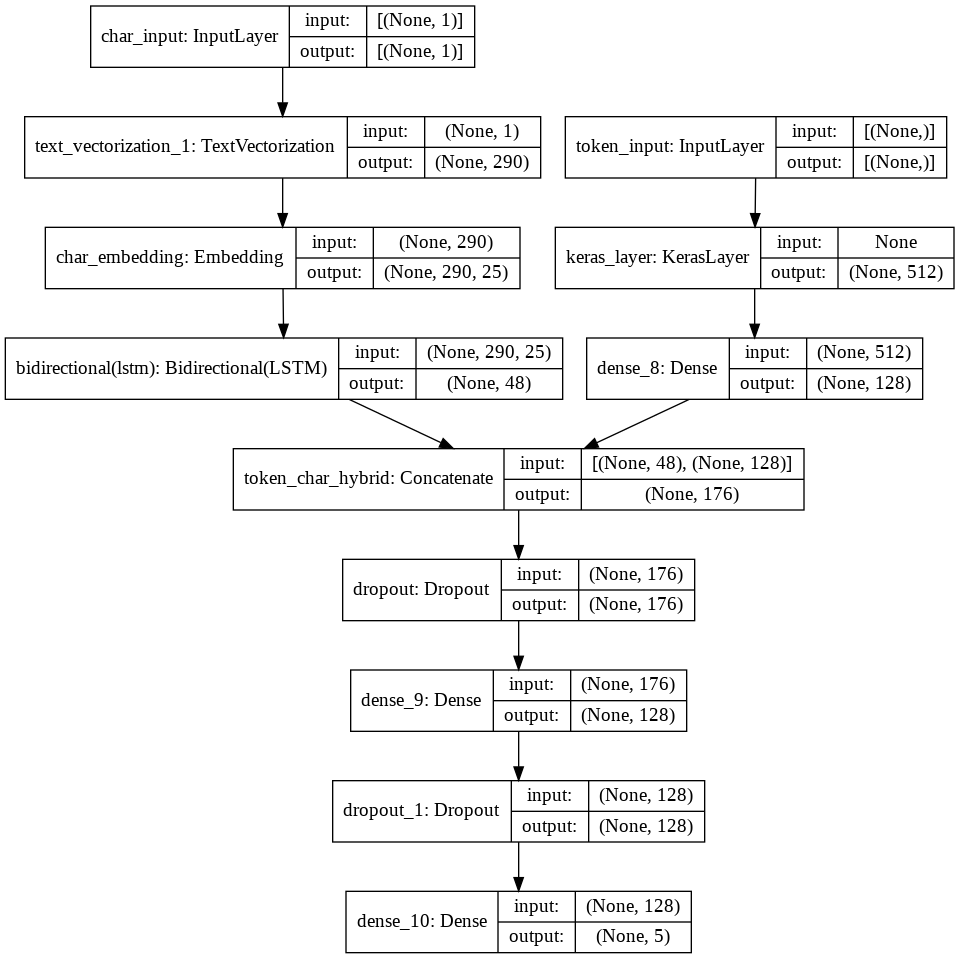

In [101]:
from tensorflow.keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [78]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [79]:
# Combining token data and char data into a dataset
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_chars,train_text))
train_token_char_label = tf.data.Dataset.from_tensor_slices(train_target)
train_char_token_dataset = tf.data.Dataset.zip((train_token_char_data,train_token_char_label))
#Batch and prefetch
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [80]:
# Combining token data and char data into a valid dataset
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_chars,val_text))
val_token_char_label = tf.data.Dataset.from_tensor_slices(val_target)
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data,val_token_char_label))
#Batch and prefetch
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [81]:
train_char_token_dataset,val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [82]:
history_4  = model_4.fit(train_char_token_dataset,epochs=5,
                         steps_per_epoch = int(0.1*len(train_char_token_dataset)), #Reducing the train data for faster evaluation
                         validation_data = val_char_token_dataset,
                         validation_steps = int(0.1*len(val_char_token_dataset)) #Only validate on 10% valid data
                         )

Epoch 1/5
562/562 [==============================] - 84s 133ms/step - loss: 0.9831 - accuracy: 0.6091 - val_loss: 0.7785 - val_accuracy: 0.6951
Epoch 2/5
562/562 [==============================] - 71s 127ms/step - loss: 0.7997 - accuracy: 0.6910 - val_loss: 0.7178 - val_accuracy: 0.7314
Epoch 3/5
562/562 [==============================] - 68s 121ms/step - loss: 0.7730 - accuracy: 0.7046 - val_loss: 0.6976 - val_accuracy: 0.7324
Epoch 4/5
562/562 [==============================] - 73s 130ms/step - loss: 0.7473 - accuracy: 0.7192 - val_loss: 0.6756 - val_accuracy: 0.7407
Epoch 5/5
562/562 [==============================] - 70s 125ms/step - loss: 0.7534 - accuracy: 0.7179 - val_loss: 0.6631 - val_accuracy: 0.7447


In [83]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 49s 52ms/step - loss: 0.6711 - accuracy: 0.7416


[0.671107292175293, 0.7416258454322815]

In [84]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred = tf.argmax(model_4_pred_probs,axis=1)
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 2, 2, 2, 4, 1])>

In [85]:
calculate_results(val_target1,model_4_pred)

{'Accuracy': 74.16258440354827,
 'F1_score': 0.7359829126432025,
 'Precision': 0.7404845369970398,
 'Recall': 0.7416258440354826}

# Model_5 : Pretrained tokn embeddings + character embedding + positional embedding

In [86]:
train_df.head(7)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,a total of @ patients with primary knee oa wer...,11
2,2,METHODS,outcome measures included pain reduction and i...,11
3,3,METHODS,pain was assessed using the visual analog pain...,11
4,4,METHODS,secondary outcome measures included the wester...,11
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",11
6,6,RESULTS,there was a clinically relevant reduction in t...,11


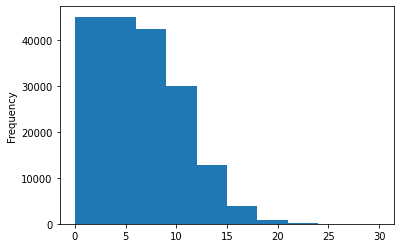

In [98]:
train_df['line_number'].plot.hist()

In [87]:
#Onehot encode the line number
train_line_number_one_hot = tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_number_one_hot = tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
test_line_number_one_hot = tf.one_hot(test_df['line_number'].to_numpy(),depth=15)

train_line_number_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

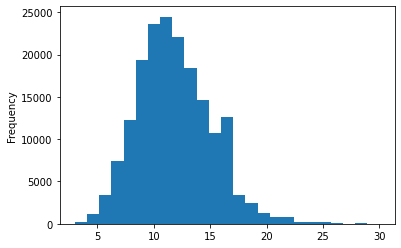

In [97]:
train_df['total_lines'].plot.hist(bins=25)


In [100]:
#Onehot encode the total lines
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
val_total_lines_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(),depth=20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(),depth=20)

train_total_lines_one_hot[1]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [102]:
from tensorflow.keras import layers

#1.Setup char input model with BiLSTM
char_input = layers.Input(shape=(1,),dtype=tf.string,name='char_input')
x = char_vectorizer(char_input)
x = embedding_char(x)
char_output = layers.Bidirectional(layers.LSTM(24))(x)

char_model = tf.keras.Model(char_input,char_output)

#2.Setup token iput model with Tensorflow hub feature vector
token_input = layers.Input(shape=(1,),dtype=tf.string,name='token_input')
y = text_vectorizer(token_input)
y = embedding(y)
y = layers.Conv1D(64,3,activation='relu',padding='same')(y)
y = layers.Conv1D(64,3,activation='relu',padding='same')(y)
y = layers.GlobalAveragePooling1D()(y)
token_output = layers.Dense(128,activation='relu')(y)
token_model = tf.keras.Model(token_input,token_output)

concat1 = layers.Concatenate(name='token_char_hybrid')([char_model.output,token_model.output])
concat1 = layers.Dense(256,activation='relu')(concat1)
concat1 = layers.Dropout(0.5)(concat1)

#Creating line number feature model
line_number_input = layers.Input(shape=(15,),dtype=tf.float32,name='line_number_input')
z = layers.Dense(32,activation='relu')(line_number_input)
z = layers.Dense(64,activation='relu')(z)
line_number_output = layers.Dense(32,activation='relu')(z)
line_number_model = tf.keras.Model(line_number_input,line_number_output)

#creating total lines feature model
total_lines_input = layers.Input(shape=(20,),dtype=tf.float32,name='total_lines_input')
w = layers.Dense(32,activation='relu')(total_lines_input)
w = layers.Dense(64,activation='relu')(w)
total_lines_output = layers.Dense(32,activation='relu')(w)
total_lines_model = tf.keras.Model(total_lines_input,total_lines_output)

#Concat line number + total lines + concat1
concat2 = layers.Concatenate(name='token_char_lineno_totallines_hybrid')([line_number_model.output,total_lines_model.output,concat1 ])

#creating output layers
v = layers.Dense(128,activation='relu')(concat2)
v = layers.Dropout(0.5)(v)
outputs = layers.Dense(5,activation='softmax')(v)

model_5 = tf.keras.Model([line_number_model.input,
                          total_lines_model.input,
                          char_model.input,
                          token_model.input],
                         outputs)

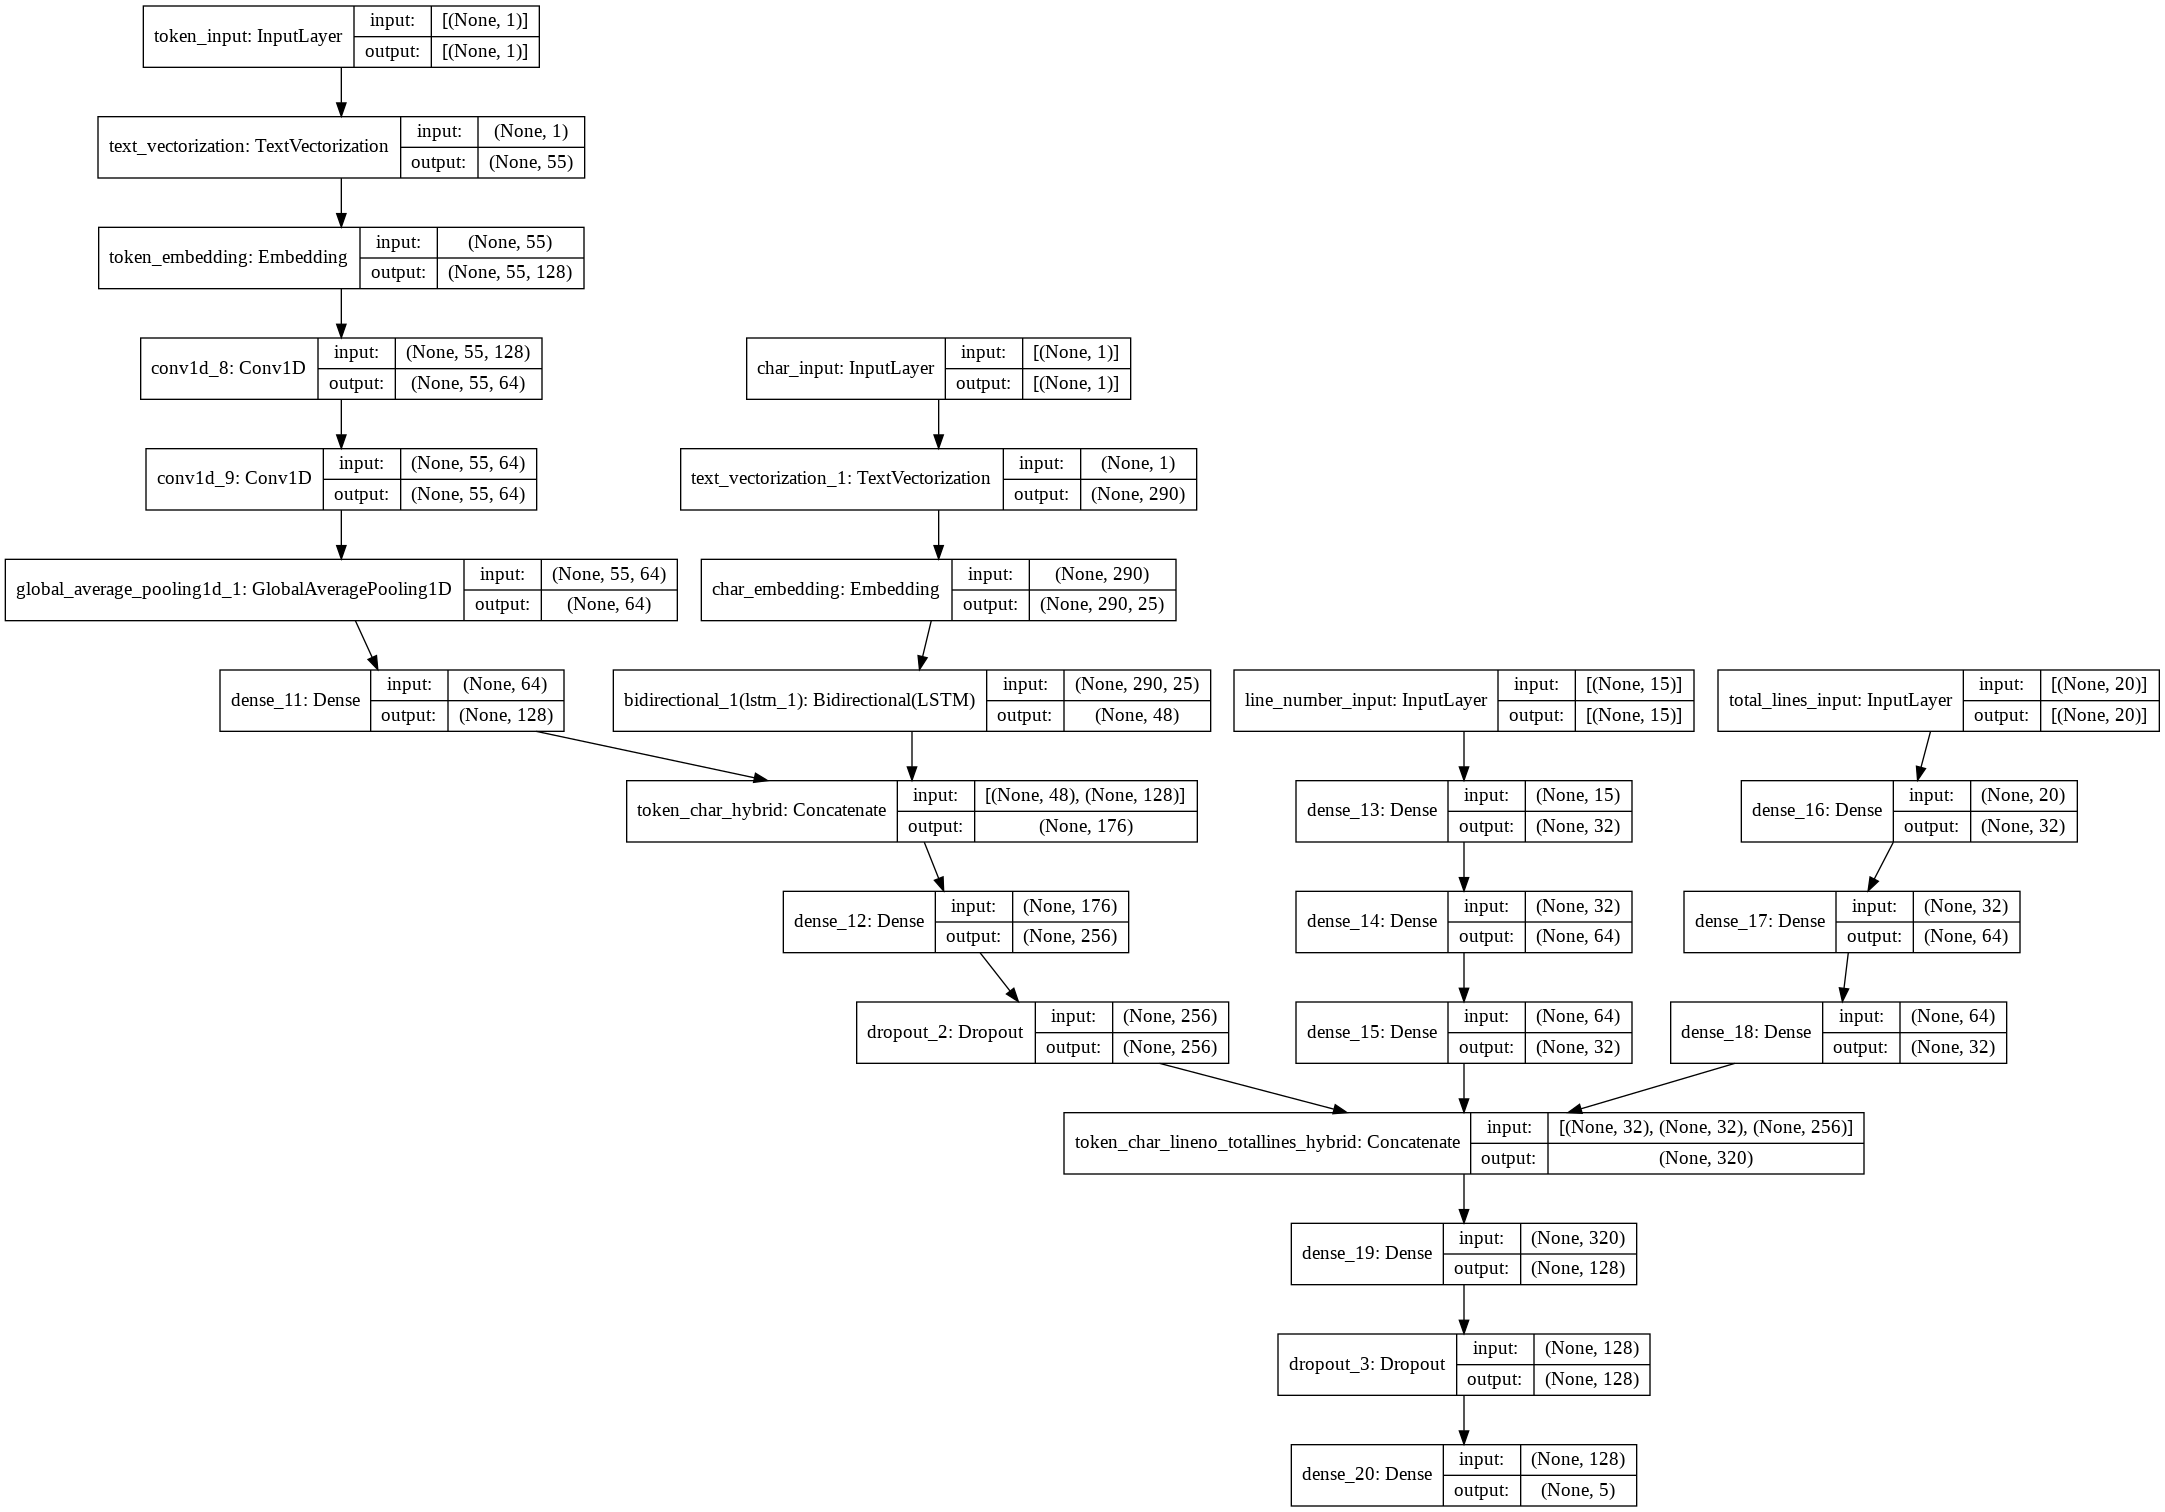

In [103]:
from tensorflow.keras.utils import plot_model
plot_model(model_5,show_shapes=True)

In [104]:
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                metrics = ['accuracy'])

In [105]:
# Combining token data and char data into a dataset
train_tribrid_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot,train_total_lines_one_hot,train_chars,train_text))
train_tribrid_label = tf.data.Dataset.from_tensor_slices(train_target)
train_tribrid_dataset = tf.data.Dataset.zip((train_tribrid_data,train_tribrid_label))
#Batch and prefetch
train_tribrid_dataset = train_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [106]:
# Combining token data and char data into a valid dataset
val_tribrid_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,val_total_lines_one_hot,val_chars,val_text))
val_tribrid_label = tf.data.Dataset.from_tensor_slices(val_target)
val_tribrid_dataset = tf.data.Dataset.zip((val_tribrid_data,val_tribrid_label))
#Batch and prefetch
val_tribrid_dataset = val_tribrid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [107]:
history_5  = model_5.fit(train_tribrid_dataset,epochs=5,
                         steps_per_epoch = int(0.1*len(train_tribrid_dataset)), #Reducing the train data for faster evaluation
                         validation_data = val_tribrid_dataset,
                         validation_steps = int(0.1*len(val_tribrid_dataset)) #Only validate on 10% valid data
                         )

Epoch 1/5
562/562 [==============================] - 110s 180ms/step - loss: 1.0076 - accuracy: 0.7816 - val_loss: 0.9137 - val_accuracy: 0.8364
Epoch 2/5
562/562 [==============================] - 99s 175ms/step - loss: 0.8929 - accuracy: 0.8694 - val_loss: 0.8885 - val_accuracy: 0.8451
Epoch 3/5
562/562 [==============================] - 96s 170ms/step - loss: 0.8788 - accuracy: 0.8738 - val_loss: 0.8781 - val_accuracy: 0.8541
Epoch 4/5
562/562 [==============================] - 100s 179ms/step - loss: 0.9080 - accuracy: 0.8549 - val_loss: 0.8713 - val_accuracy: 0.8607
Epoch 5/5
562/562 [==============================] - 95s 169ms/step - loss: 0.9035 - accuracy: 0.8612 - val_loss: 0.8658 - val_accuracy: 0.8753


In [108]:
model_5_pred_probs = model_5.predict(val_tribrid_dataset)
model_5_pred = tf.argmax(model_5_pred_probs,axis=1)
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [109]:
calculate_results(val_target1,model_5_pred)

{'Accuracy': 86.7999470409109,
 'F1_score': 0.8645879488413569,
 'Precision': 0.8761202759369372,
 'Recall': 0.867999470409109}